In [5]:
import os, sys
# point Python to the folder where problem1a.py etc. actually live
module_dir = r"C:\Users\prana\Downloads\CS663\Assignment1\Question2"
if module_dir not in sys.path:
    sys.path.insert(0, module_dir)
os.chdir(module_dir)  # optional but keeps relative paths consistent

Processing receipt...


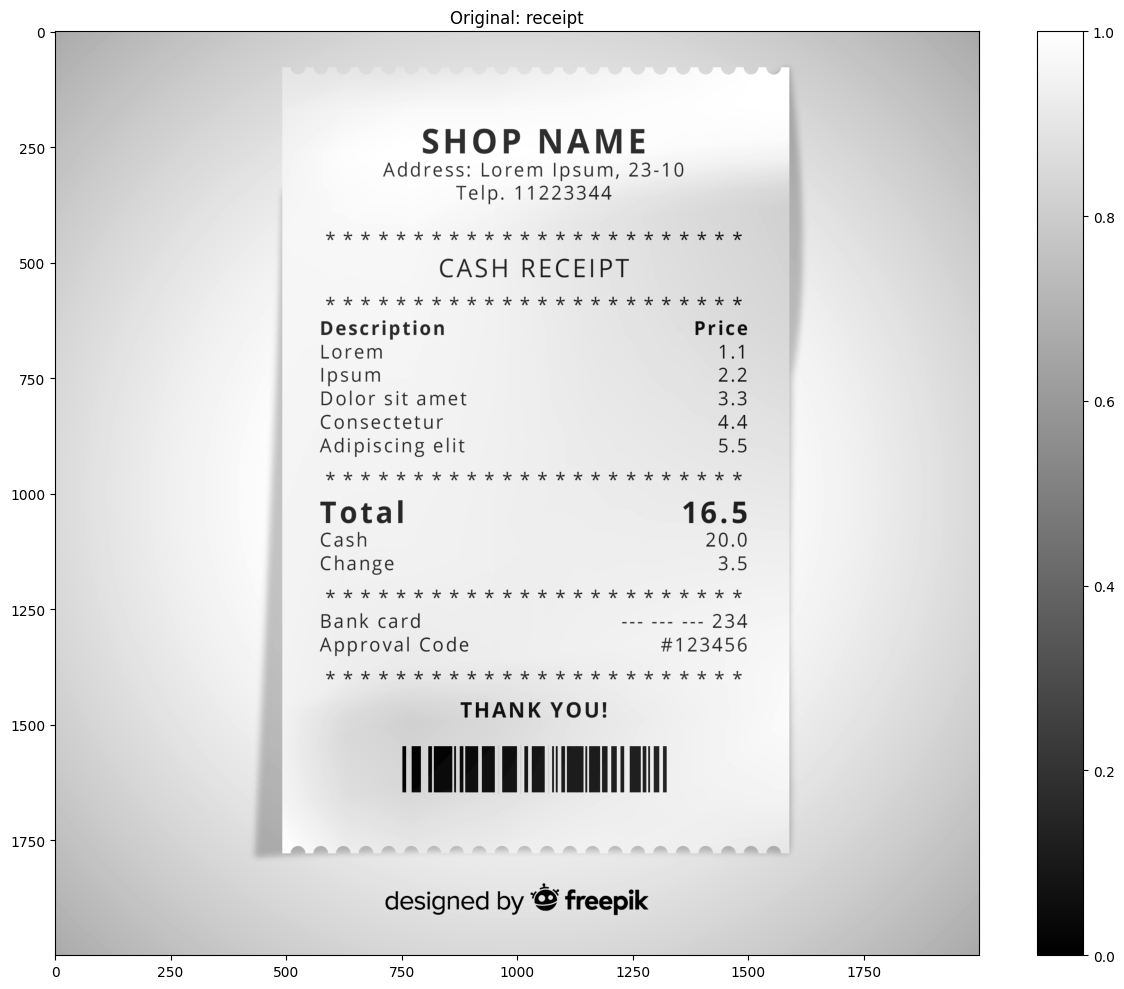

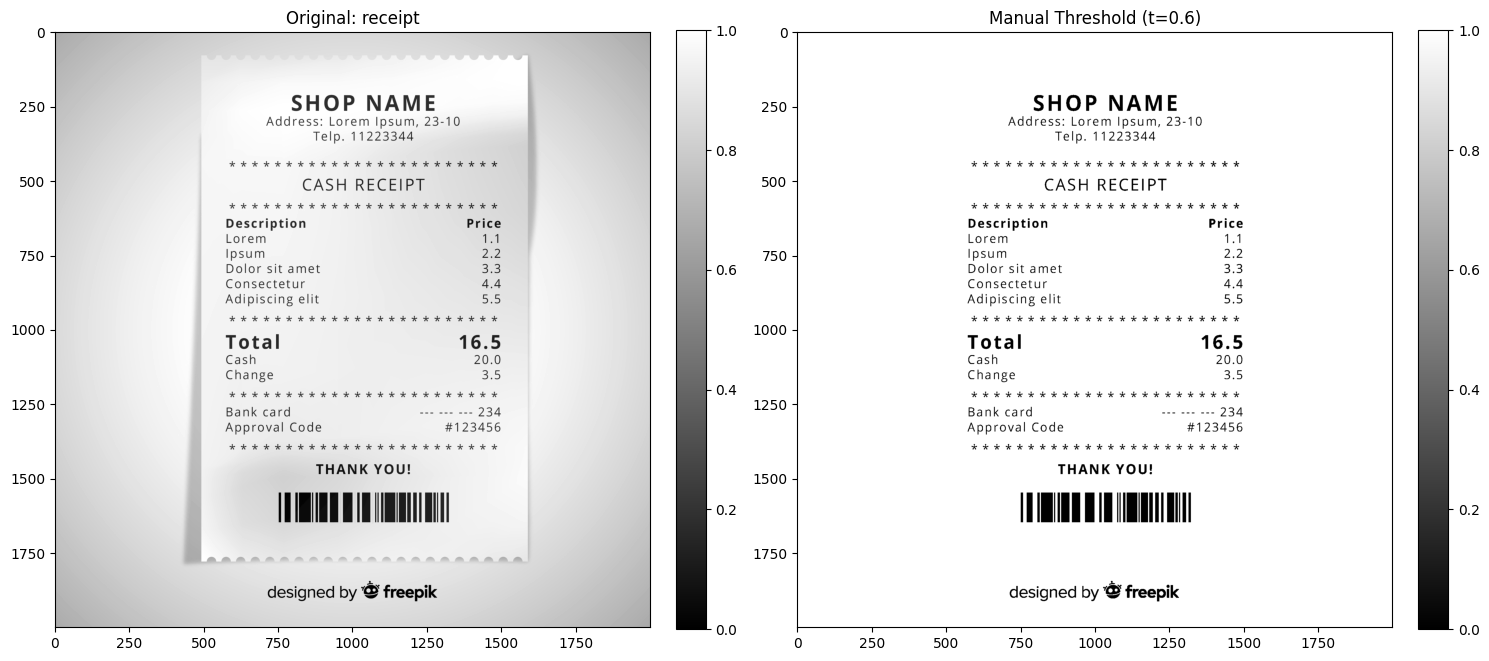

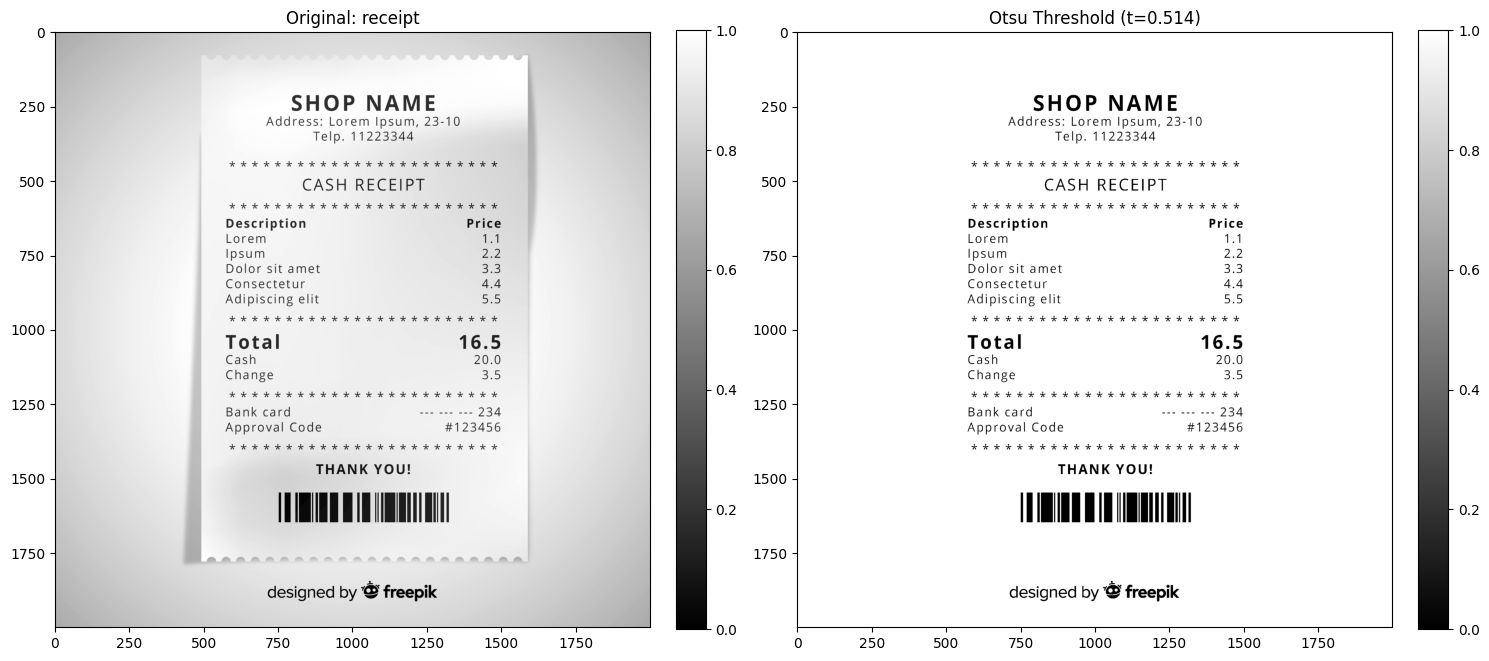

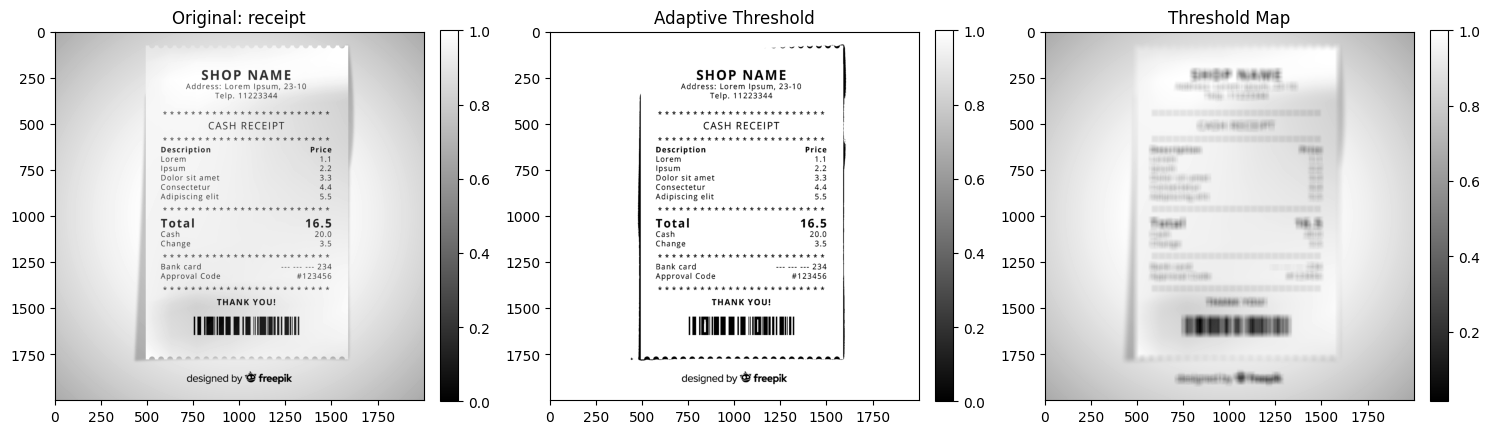

Processing blackboard...


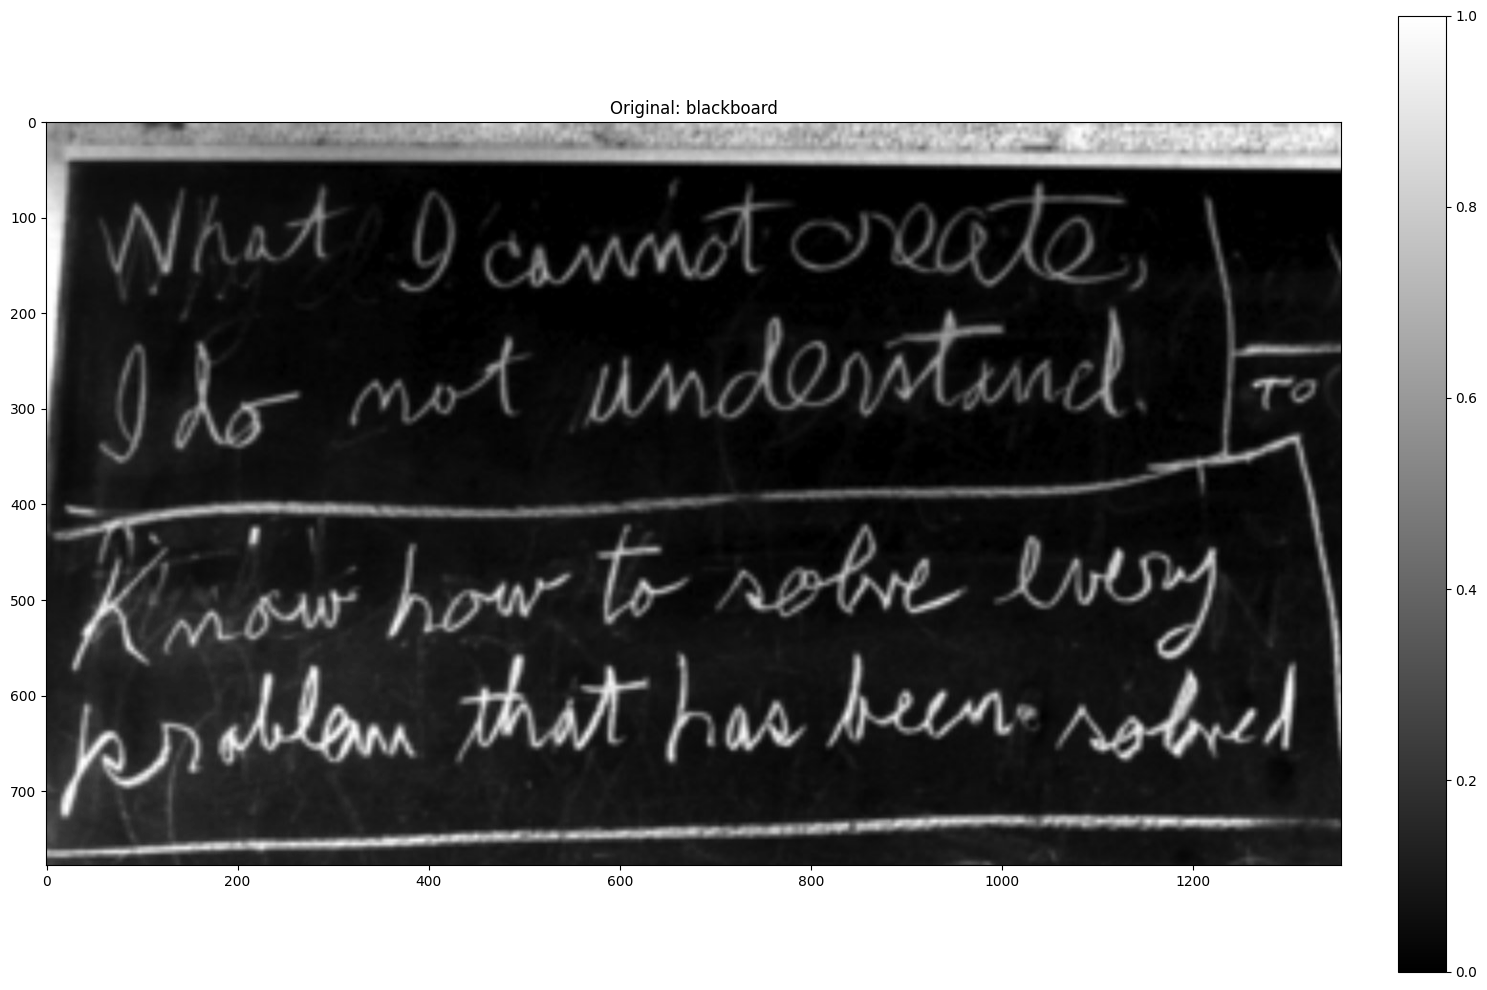

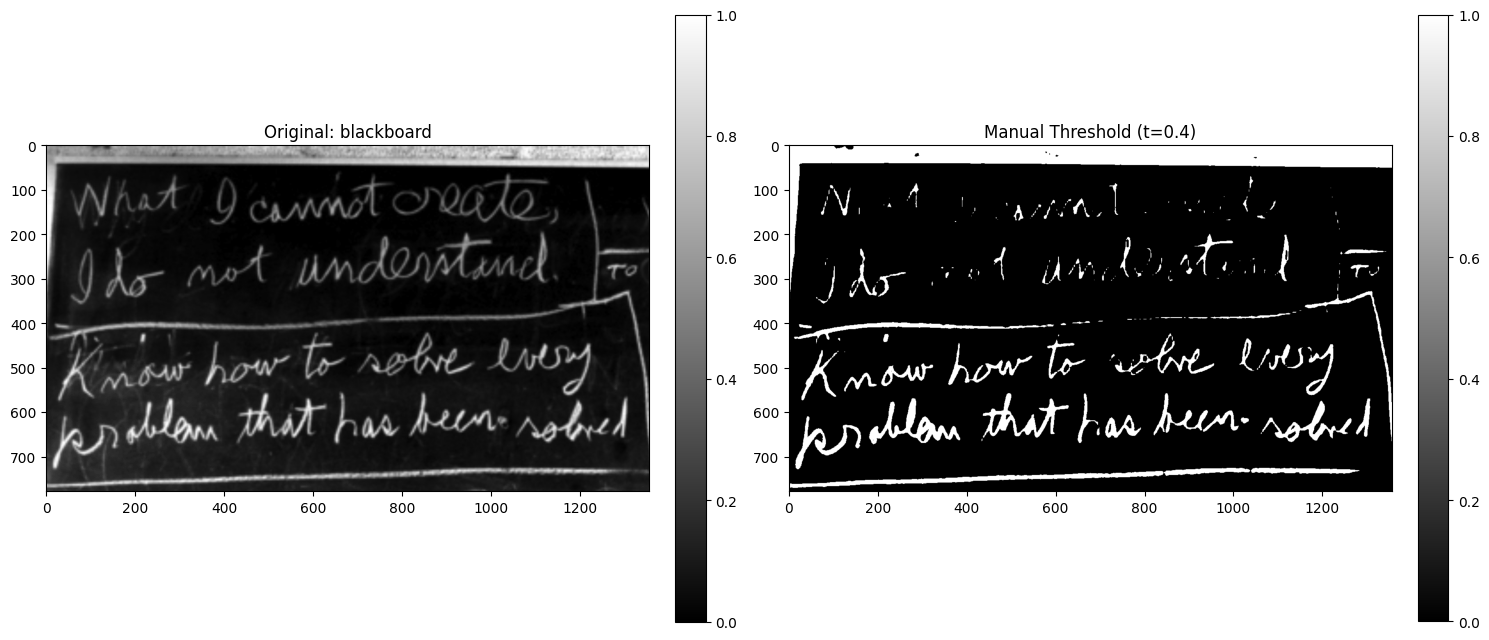

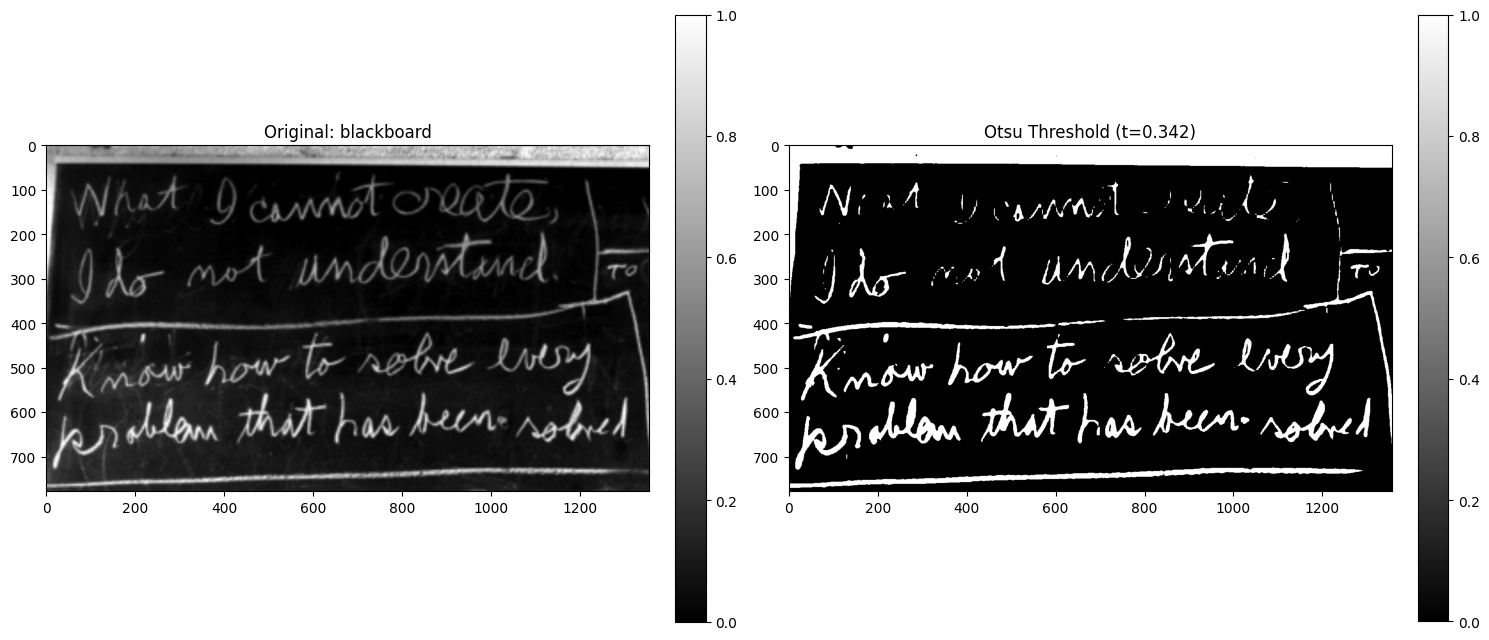

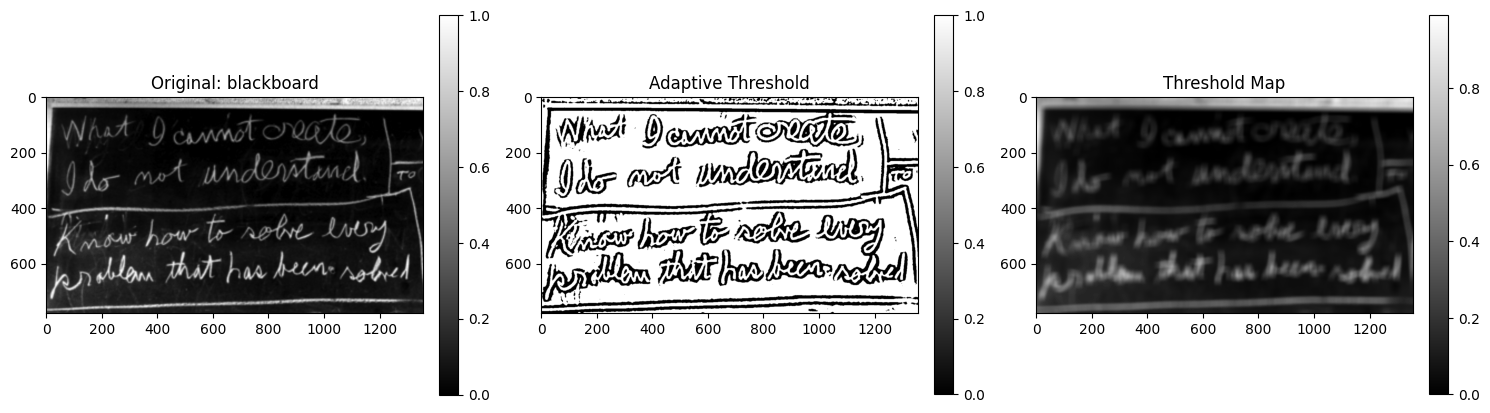

Processing lilavati...


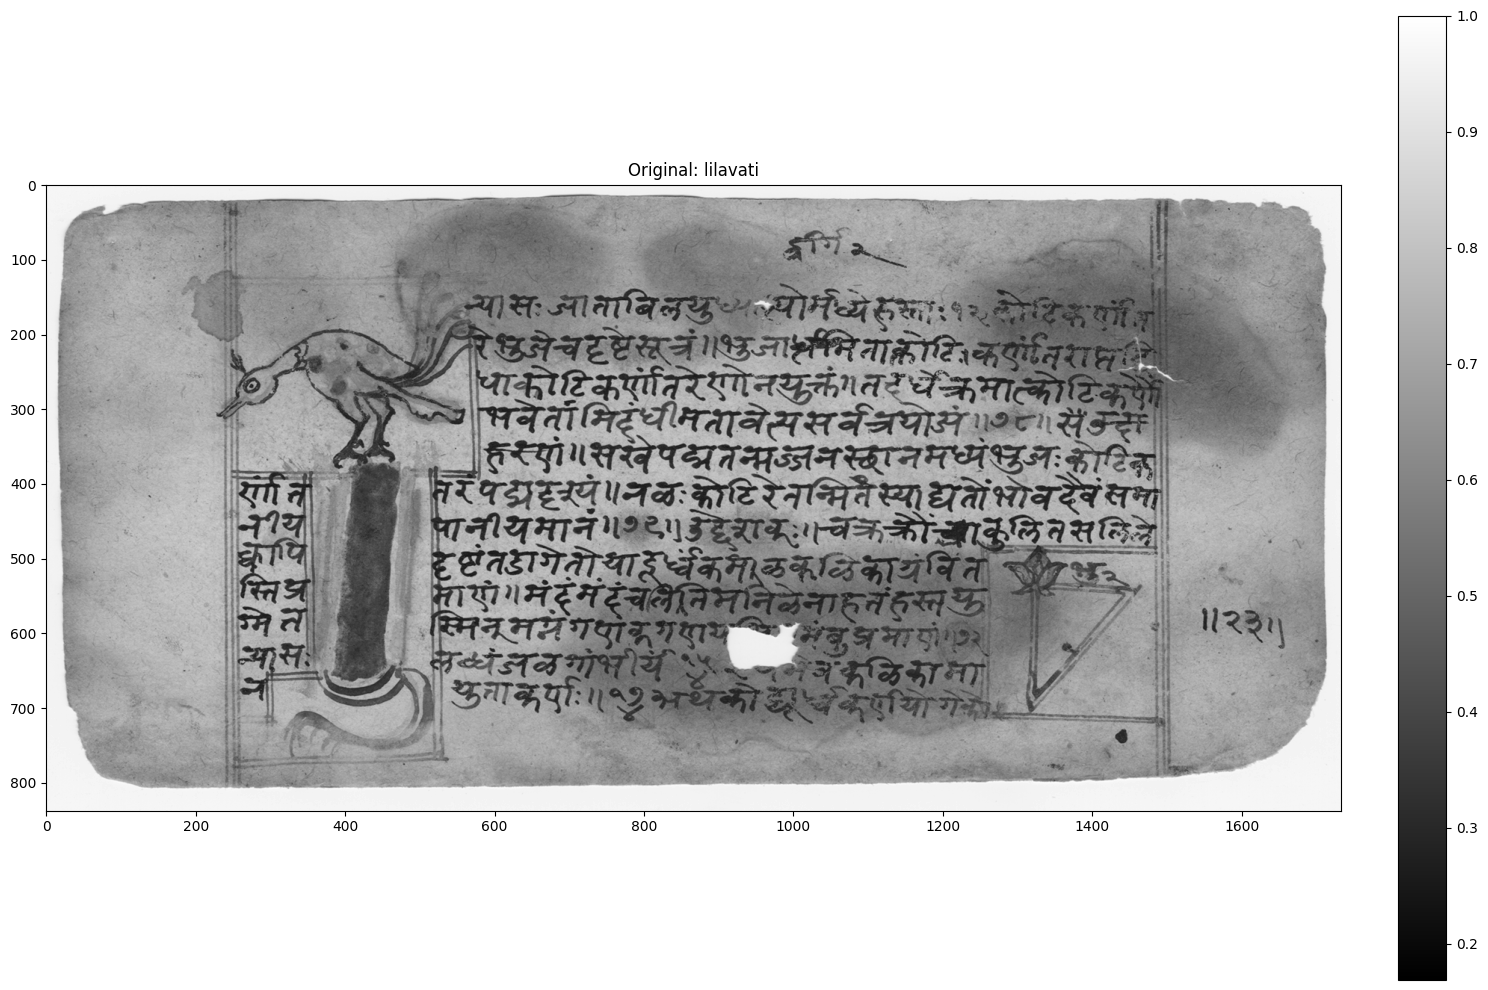

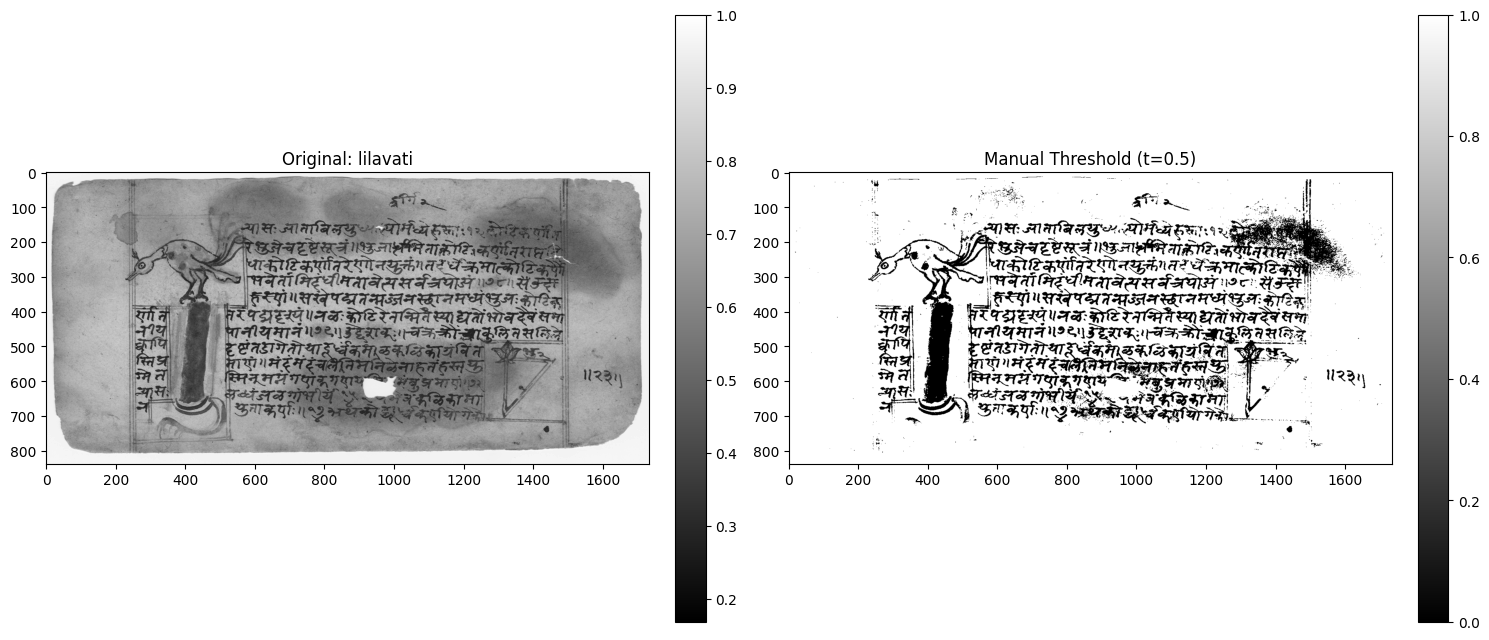

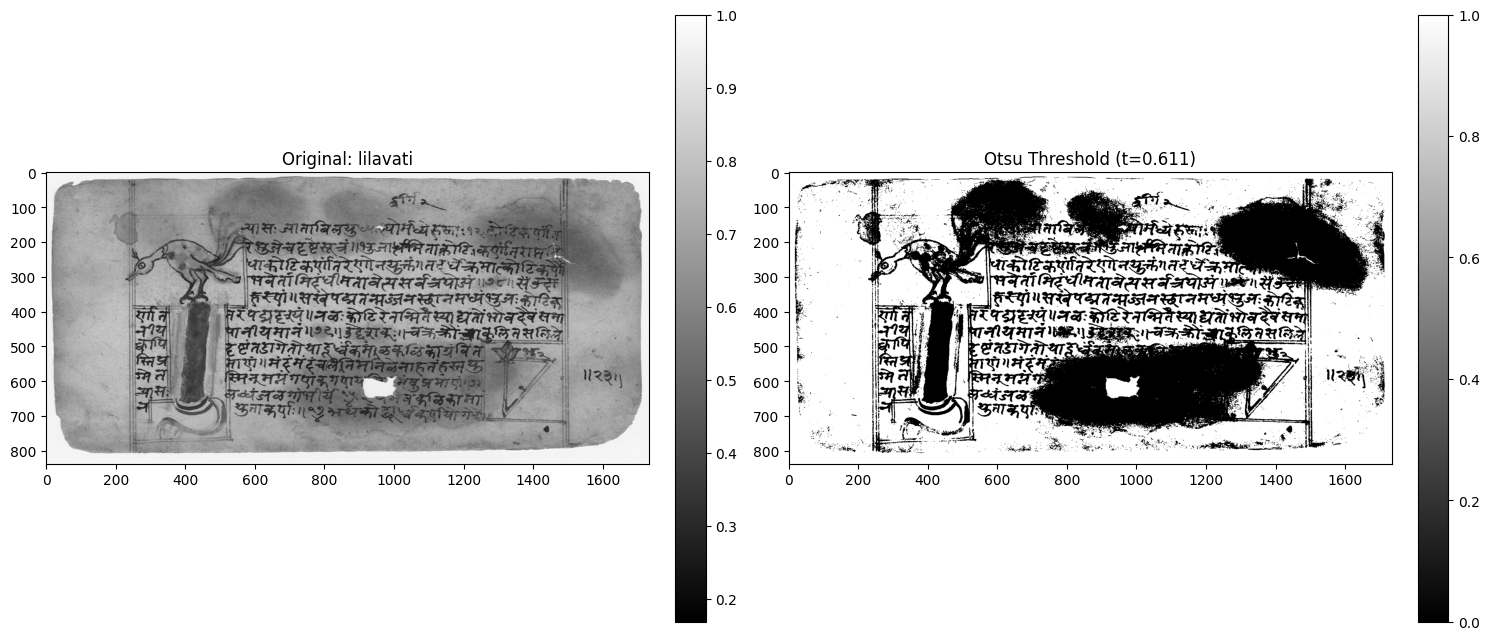

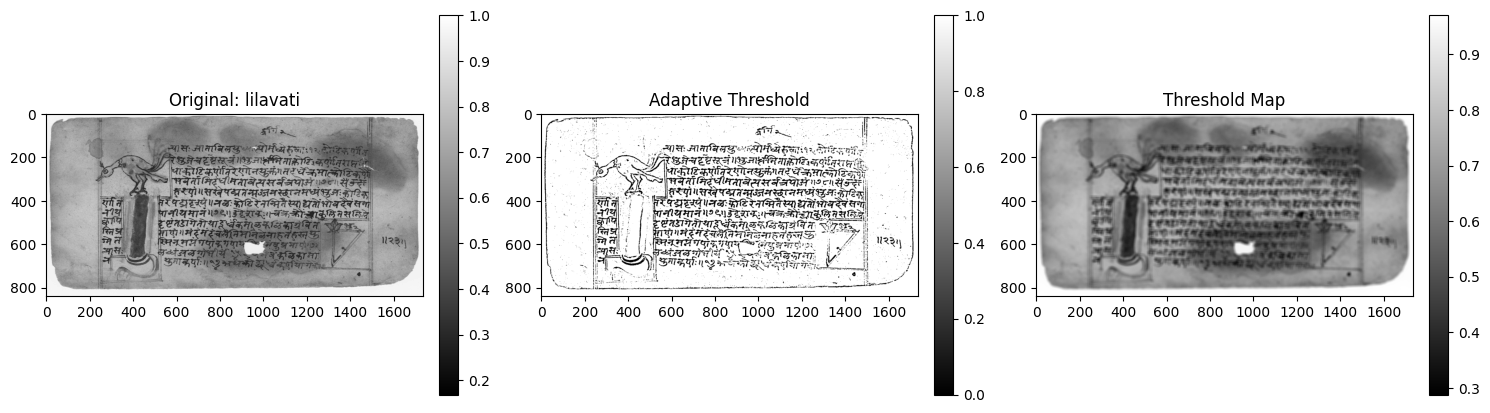

Processing qr...


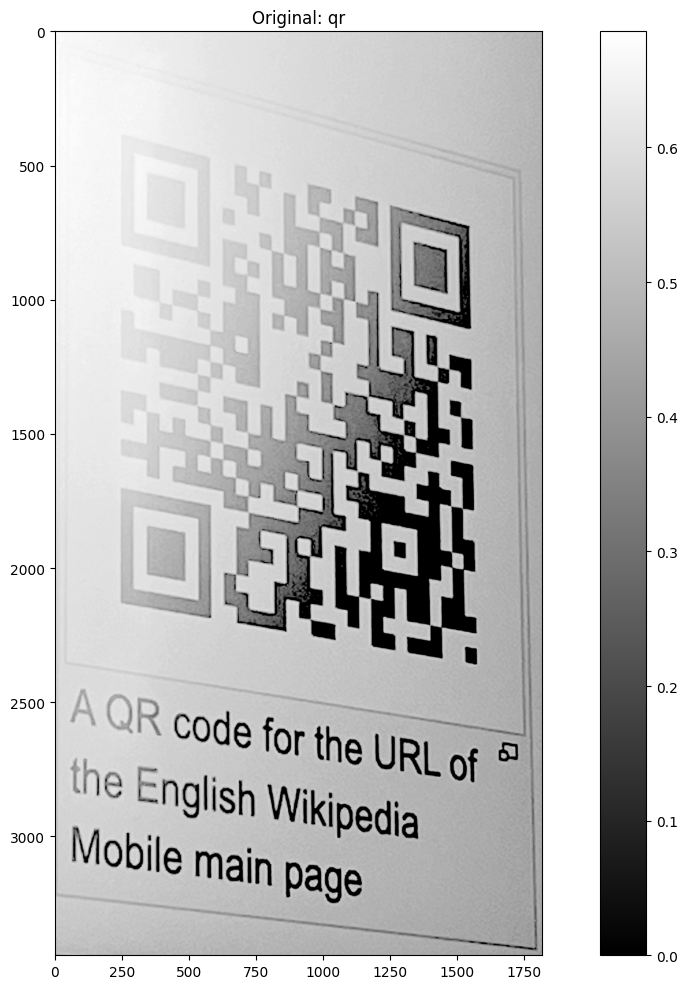

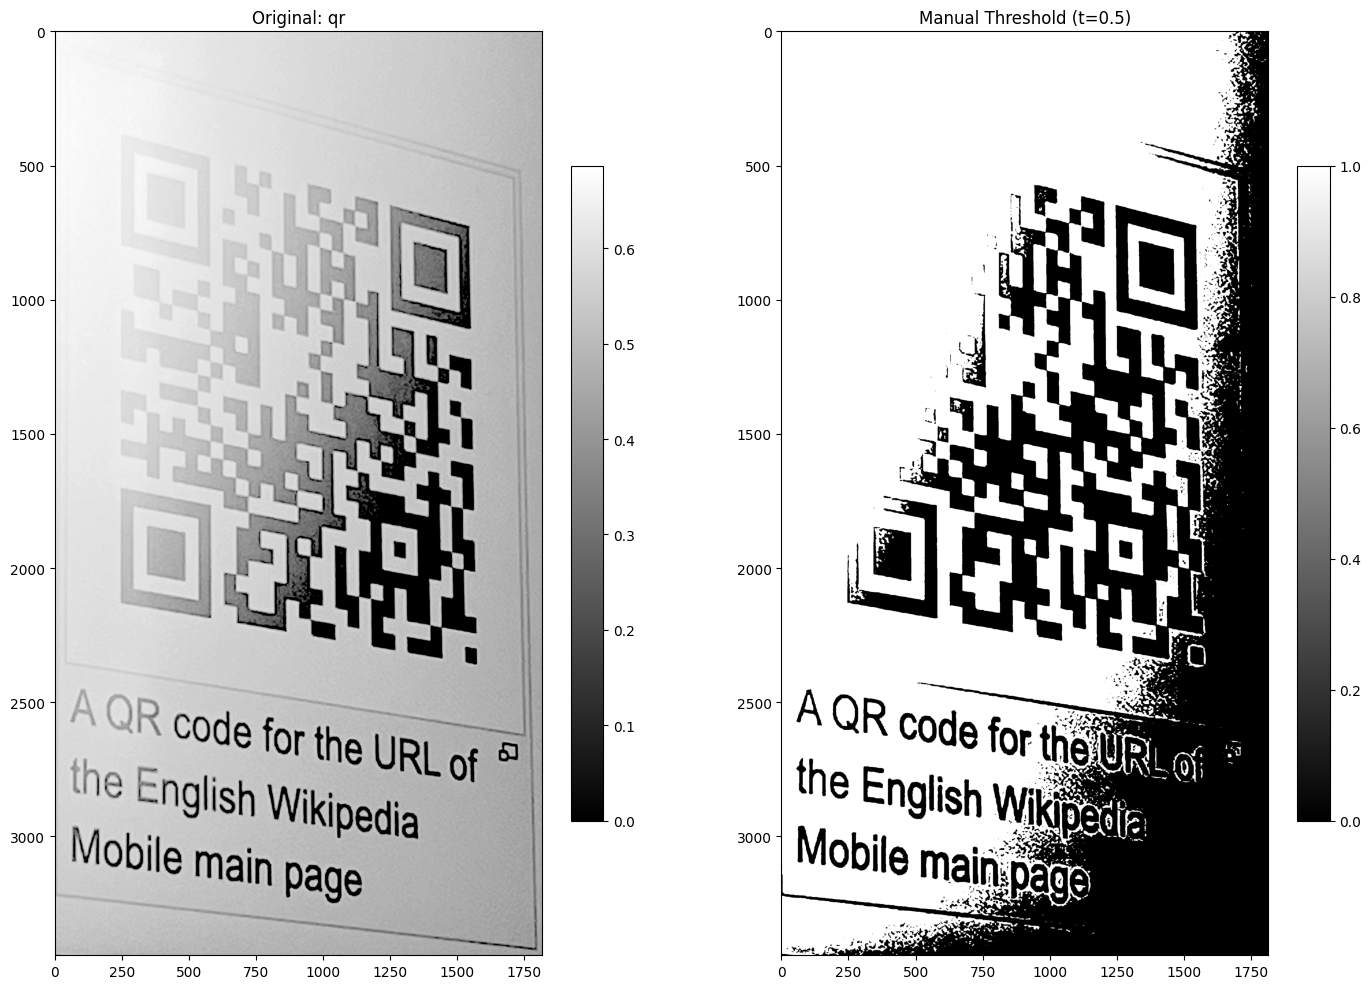

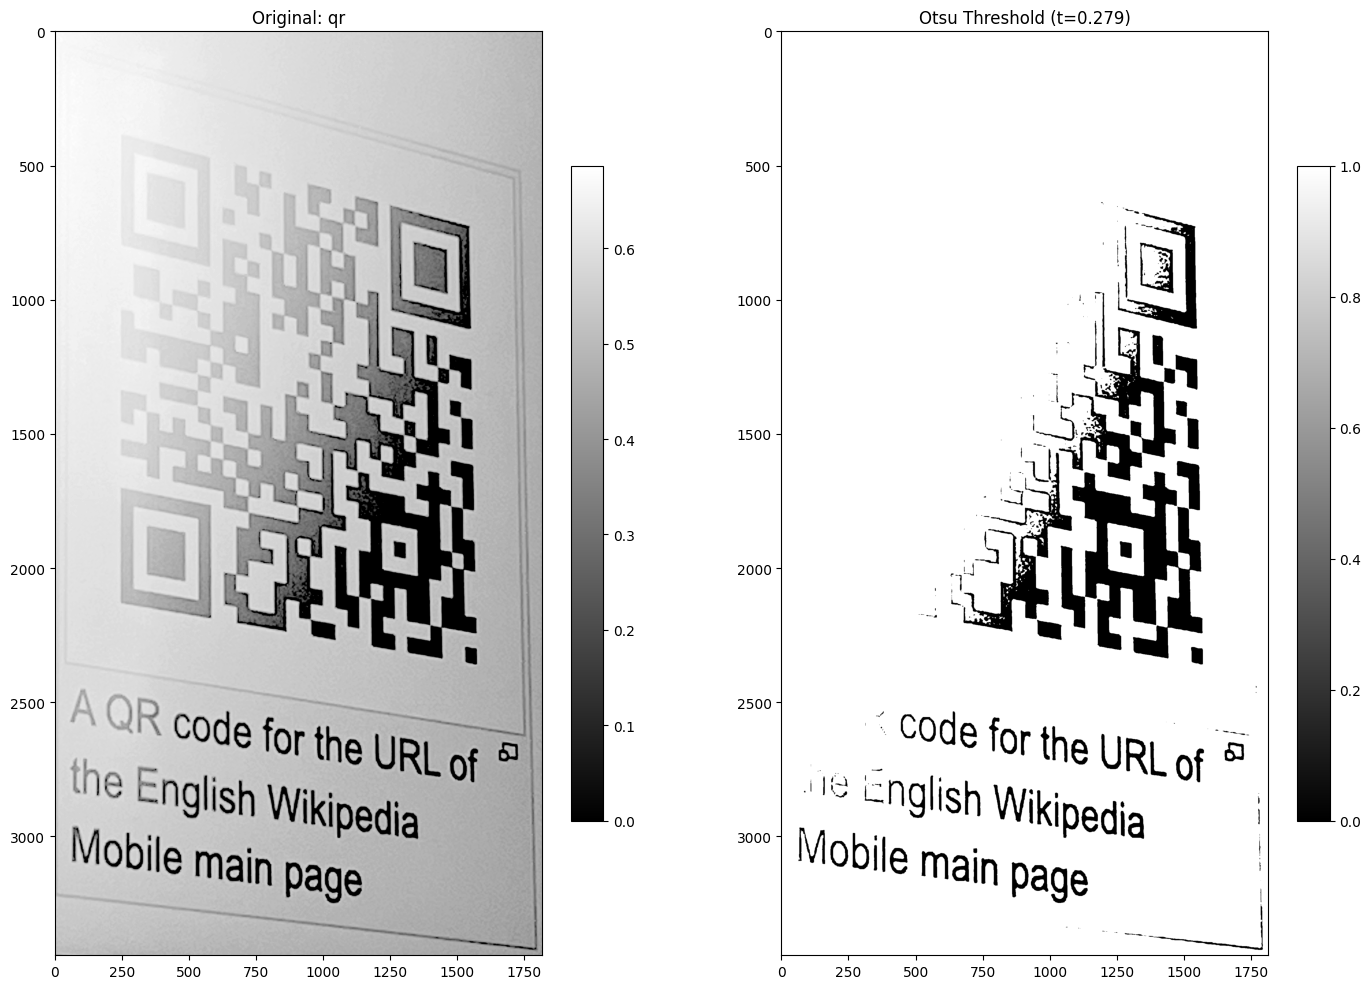

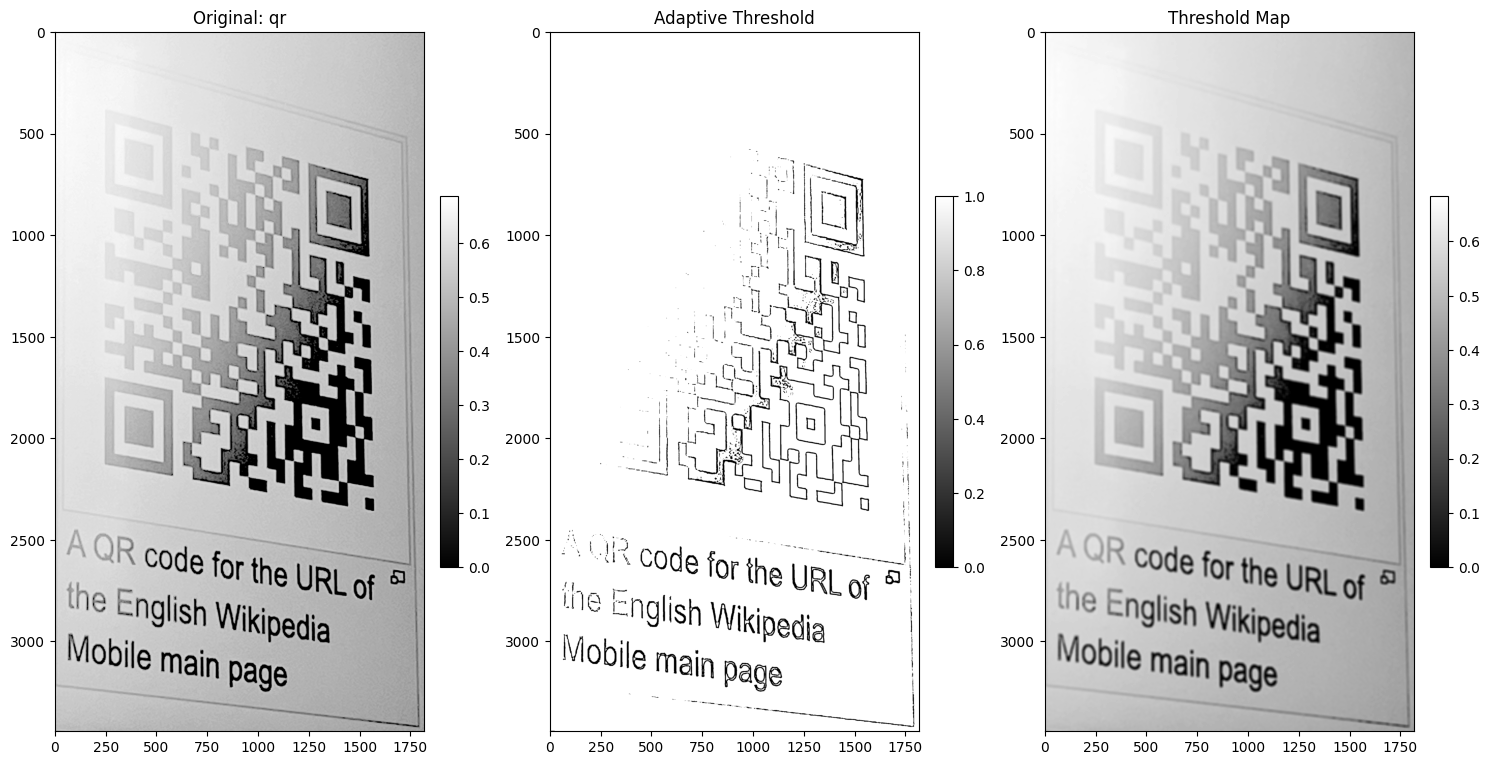

In [10]:
from ImageLoader import ImageLoader
from ManualThresholder import ManualThresholder
from OtsuThresholder import OtsuThresholder
from AdaptiveThresholder import AdaptiveThresholder
from ImageDisplayer import ImageDisplayer

def main():
    image_files = {
        "receipt": r"C:\Users\prana\Downloads\CS663\Assignment1\Question2\data\thresh\receipt.png",
        "blackboard": r"C:\Users\prana\Downloads\CS663\Assignment1\Question2\data\thresh\blackboard.png",
        "lilavati": r"C:\Users\prana\Downloads\CS663\Assignment1\Question2\data\thresh\lilavati.tif",
        "qr": r"C:\Users\prana\Downloads\CS663\Assignment1\Question2\data\thresh\qr.png"
    }
    
    loader = ImageLoader()
    displayer = ImageDisplayer()
    images = loader.load_images(image_files)
    
    for name, img in images.items():
        print(f"Processing {name}...")
        displayer.display_images([img], [f"Original: {name}"], filename=f"{name}_original.png")

        if name == "receipt":
            manual_thresh = 0.6
        elif name == "blackboard":
            manual_thresh = 0.4
        elif name == "lilavati":
            manual_thresh = 0.5
        else:
            manual_thresh = 0.5

        manual_result = ManualThresholder.threshold(img, manual_thresh)
        displayer.display_images([img, manual_result],
                  [f"Original: {name}", f"Manual Threshold (t={manual_thresh})"],
                  filename=f"{name}_manual.png")

        otsu_result, otsu_thresh = OtsuThresholder.threshold(img)
        displayer.display_images([img, otsu_result],
                  [f"Original: {name}", f"Otsu Threshold (t={otsu_thresh:.3f})"],
                  filename=f"{name}_otsu.png")

        if name == "receipt":
            block_size, c = 35, 0.05
        elif name == "blackboard":
            block_size, c = 25, 0.03
        elif name == "lilavati":
            block_size, c = 15, 0.07
        else:
            block_size, c = 15, 0.05

        adaptive_result, threshold_map = AdaptiveThresholder.threshold(img, block_size=block_size, c=c)
        displayer.display_images([img, adaptive_result, threshold_map],
                  [f"Original: {name}", "Adaptive Threshold", "Threshold Map"],
                  filename=f"{name}_adaptive.png")

if __name__ == "__main__":
    main()